# Problem 6: Kernel Density Estimation

For estimating,
$$
p(x)=\left\{\begin{array}{cc}
\frac{1}{2} & \text { for } 0<x<2 \\
0 & \text {otherwise }
\end{array}\right.
$$,

using kernel density estimation we have,
$$
p_n(\mathbf{x})=\frac{1}{n} \sum_{i=1}^n \frac{1}{V_n} \varphi\left(\frac{\mathbf{x}-\mathbf{x}_i}{h_n}\right)
$$
where, $\varphi(u)$ is a density function that we call Kernel (Window) function, $h_n$ is the bandwidth or window width and $\mathbf{x}_i$ is the $i$-th training data.

Here, $\mathbf{x}$ is 1-dimensional.

## Packages
First we import all necessary libraries.

In [126]:
import numpy as np
import matplotlib.pyplot as plt

## Kernel Function

Now we implement the standard Gaussian kernel, 
$$
\varphi(x)=\frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2}x^2}.
$$

In [127]:
def std_gaussian_kernel(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp((-1/2) * (x ** 2))

## Kernel Density Estimator

Then, we create a function implementing the kernel density estimator $p_n(x)$, which takes as its argument hyper-parameter bandwidth, $h_n$. Notice how since $x$ is 1-dimensional, thus, $h_n = V_n$. Therefore we can rewrite the kernel density estimator in this case as:

$$
p_n(x)=\frac{1}{n} \sum_{i=1}^n \frac{1}{h_n} \varphi\left(\frac{x-x_i}{h_n}\right)
$$

In [128]:
def kernelDensityEstimator(bandwidth, x, x_train):
    p_hat = 0
    n = len(x_train)

    for i in range(n):
        phi = std_gaussian_kernel((x - x_train[i]) / bandwidth)
        p_hat += (1 / n) * (1 / bandwidth) * phi

    return p_hat

## Test

We use our code to estimate $p(x)$ using $V_n$ (same as $h_n$) of $0.05$ and $0.2$ separately. We should expect to see more spiky estimate using the smaller $V_n$ and more smoothing with the larger $V_n$. We also separately use different training data sizes of 32, 256, and 5000. To make the test work we need to also have a true representation of the density we are estimating.

In [129]:
def uniform_density(x, a, b):
    # Initialize output array with zeros
    pdf = np.zeros_like(x)

    # Make the values in (a, b) equal to 1 / (b - a)
    mask = (a <= x) & (x <= b)
    pdf[mask] = 1 / (b - a)
    
    return pdf

In [194]:
def visualize(x_true, p_true, p_hat, train_size, bandwidth):
    # Visualize the results
    plt.style.use("bmh")
    fix, ax = plt.subplots()
    ax.plot(x_true, p_hat, label="$p_n(x)$", linewidth=3)
    ax.plot(x_true, p_true, label="$p(x)$", linewidth=3)
    ax.set_xlim(-1, 3)
    ax.legend()
    ax.grid(True)
    ax.set_xlabel("$x$")
    ax.set_ylabel("Density")
    plt.title(f"Kernel density (Parzen window) estimate vs true density with $V_n = {bandwidth}$, $n = {train_size}$")
    # plt.savefig("f256 - 3", dpi = 200)
    plt.show()

### Case 1: $V_n = 0.05$

In [203]:
bandwidth = 0.05

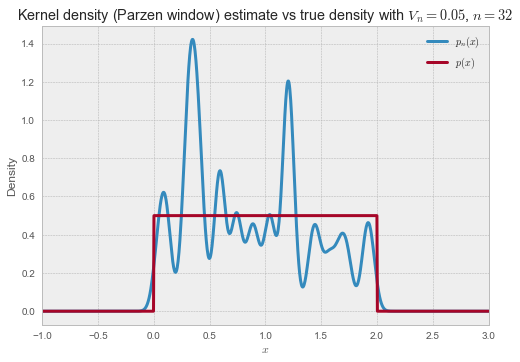

In [196]:
# Training size of 32
# Set up the true distribution
x_true = np.linspace(-1, 3, 1000)
p_true = uniform_density(x_true, 0, 2)

# Training data
np.random.seed(42)
train_size = 32
x_train = np.random.uniform(low=0, high=2, size=train_size) 
           
# Use the estimator on the data
p_hat = kernelDensityEstimator(bandwidth, x_true, x_train)

# Visualize the results
visualize(x_true, p_true, p_hat, train_size, bandwidth)

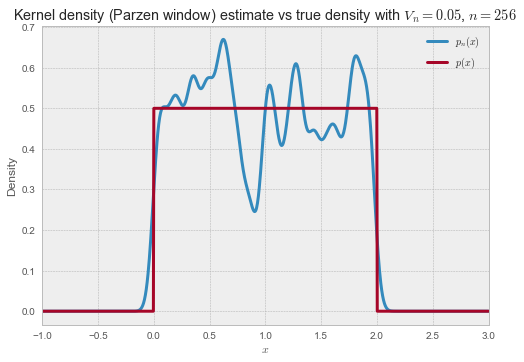

In [200]:
# Training size of 256
# Set up the true distribution
x_true = np.linspace(-1, 3, 1000)
p_true = uniform_density(x_true, 0, 2)

# Training data
np.random.seed(42)
train_size = 256
x_train = np.random.uniform(low=0, high=2, size=train_size) 
           
# Use the estimator on the data
p_hat = kernelDensityEstimator(bandwidth, x_true, x_train)

# Visualize the results
visualize(x_true, p_true, p_hat, train_size, bandwidth)

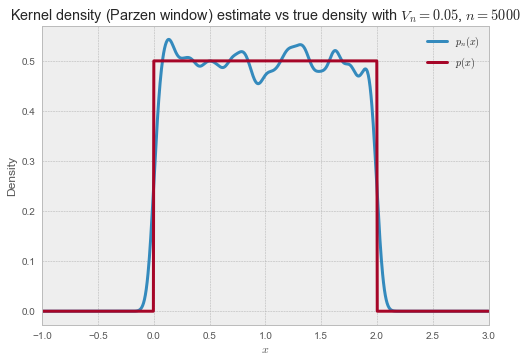

In [204]:
# Training size of 5000
# Set up the true distribution
x_true = np.linspace(-1, 3, 1000)
p_true = uniform_density(x_true, 0, 2)

# Training data
np.random.seed(42)
train_size = 5000
x_train = np.random.uniform(low=0, high=2, size=train_size) 
           
# Use the estimator on the data
p_hat = kernelDensityEstimator(bandwidth, x_true, x_train)

# Visualize the results
visualize(x_true, p_true, p_hat, train_size, bandwidth)

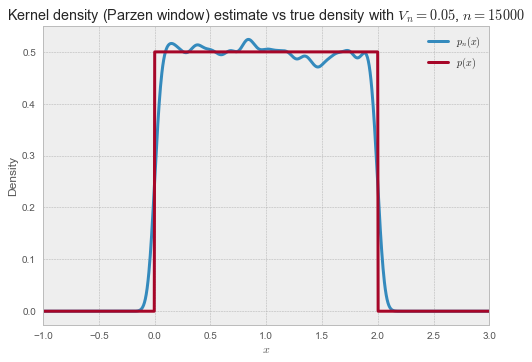

In [151]:
# Training size of 15000
# Set up the true distribution
x_true = np.linspace(-1, 3, 1000)
p_true = uniform_density(x_true, 0, 2)

# Training data
np.random.seed(42)
train_size = 15000
x_train = np.random.uniform(low=0, high=2, size=train_size) 
           
# Use the estimator on the data
p_hat = kernelDensityEstimator(bandwidth, x_true, x_train)

# Visualize the results
visualize(x_true, p_true, p_hat, train_size, bandwidth)

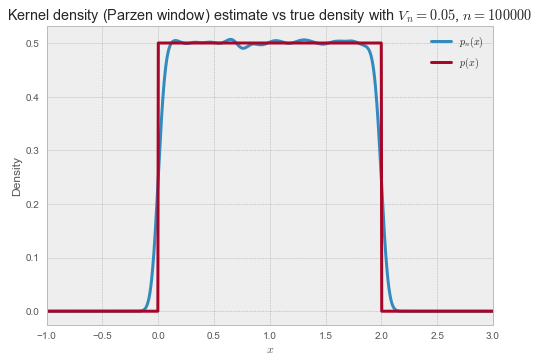

In [152]:
# Training size of 100000
# Set up the true distribution
x_true = np.linspace(-1, 3, 1000)
p_true = uniform_density(x_true, 0, 2)

# Training data
np.random.seed(42)
train_size = 100000
x_train = np.random.uniform(low=0, high=2, size=train_size) 
           
# Use the estimator on the data
p_hat = kernelDensityEstimator(bandwidth, x_true, x_train)

# Visualize the results
visualize(x_true, p_true, p_hat, train_size, bandwidth)

### Case 2: $V_n = 0.2$

In [205]:
bandwidth = 0.2

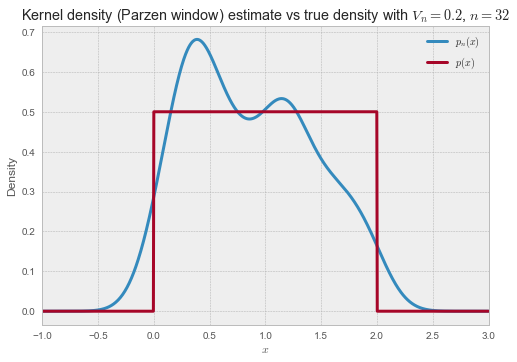

In [198]:
# Training size of 32
# Set up the true distribution
x_true = np.linspace(-1, 3, 1000)
p_true = uniform_density(x_true, 0, 2)

# Training data
np.random.seed(42)
train_size = 32
x_train = np.random.uniform(low=0, high=2, size=train_size) 
           
# Use the estimator on the data
p_hat = kernelDensityEstimator(bandwidth, x_true, x_train)

# Visualize the results
visualize(x_true, p_true, p_hat, train_size, bandwidth)

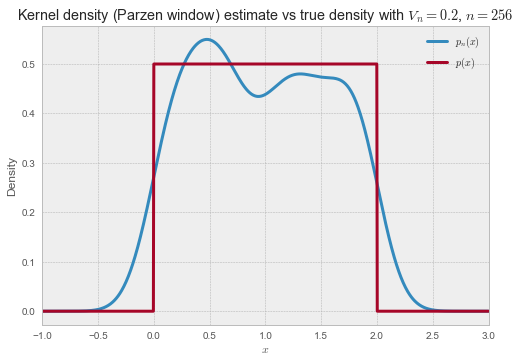

In [202]:
# Training size of 256
# Set up the true distribution
x_true = np.linspace(-1, 3, 1000)
p_true = uniform_density(x_true, 0, 2)

# Training data
np.random.seed(42)
train_size = 256
x_train = np.random.uniform(low=0, high=2, size=train_size) 
           
# Use the estimator on the data
p_hat = kernelDensityEstimator(bandwidth, x_true, x_train)

# Visualize the results
visualize(x_true, p_true, p_hat, train_size, bandwidth)

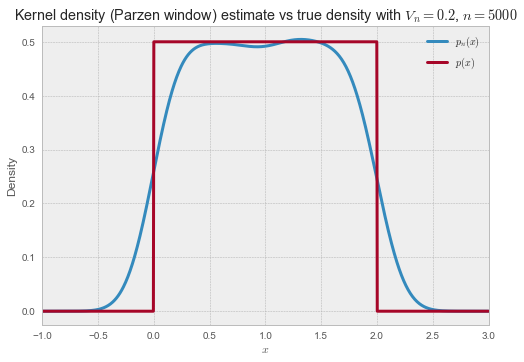

In [206]:
# Training size of 5000
# Set up the true distribution
x_true = np.linspace(-1, 3, 1000)
p_true = uniform_density(x_true, 0, 2)

# Training data
np.random.seed(42)
train_size = 5000
x_train = np.random.uniform(low=0, high=2, size=train_size) 
           
# Use the estimator on the data
p_hat = kernelDensityEstimator(bandwidth, x_true, x_train)

# Visualize the results
visualize(x_true, p_true, p_hat, train_size, bandwidth)

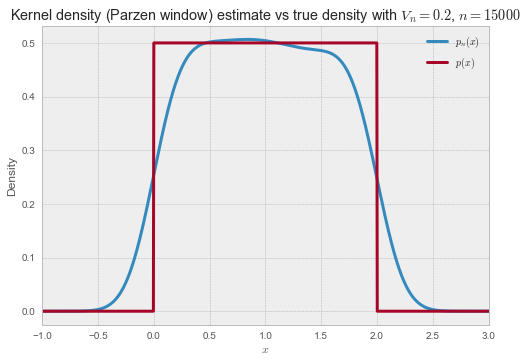

In [157]:
# Training size of 15000
# Set up the true distribution
x_true = np.linspace(-1, 3, 1000)
p_true = uniform_density(x_true, 0, 2)

# Training data
np.random.seed(42)
train_size = 15000
x_train = np.random.uniform(low=0, high=2, size=train_size) 
           
# Use the estimator on the data
p_hat = kernelDensityEstimator(bandwidth, x_true, x_train)

# Visualize the results
visualize(x_true, p_true, p_hat, train_size, bandwidth)

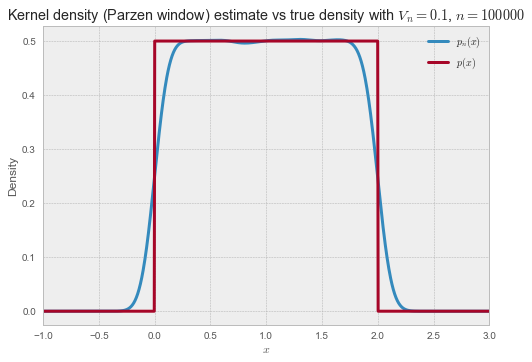

In [167]:
# Training size of 100000
# Set up the true distribution
x_true = np.linspace(-1, 3, 1000)
p_true = uniform_density(x_true, 0, 2)

# Training data
np.random.seed(42)
train_size = 100000
x_train = np.random.uniform(low=0, high=2, size=train_size) 
           
# Use the estimator on the data
p_hat = kernelDensityEstimator(bandwidth, x_true, x_train)

# Visualize the results
visualize(x_true, p_true, p_hat, train_size, bandwidth)